# Understanding Monte Carlo methods

# Example 1: Coin Flip Example

## Monte Carlo Approximation of an Integral using Bernoulli Draws

This exercise demonstrates how to approximate an integral (sum) using Monte Carlo simulation.

Specifically, we will estimate the expected value of a Bernoulli random variable.

## Background: Bernoulli Distribution

A Bernoulli distribution describes a random experiment with two possible outcomes: success (e.g., heads) or failure (e.g., tails).

It's parameterized by a single value, *p*, which represents the probability of success.

* **Random Variable:**
    - Let $X$ be a Bernoulli random variable, denoted as $X ~ Bernoulli(p)$.
* **Probability Mass Function (PMF):**
    * $P(X = 1) = p$ (probability of success)
    * $P(X = 0) = 1 - p$ (probability of failure)
* **Expected Value (Mean):**
    - $E[X] = p$
* **Variance:**
    - $Var(X) = p(1 - p)$

## Problem Statement

The goal is to estimate the expected value of a (Bernoulli) random variable using Monte Carlo simulation.

## Monte Carlo Simulation

We can approximate the expected value of a random variable using Monte Carlo simulation. The general procedure involves:

1.  **Generate Random Samples:**
    * Draw *N* independent random samples from the distribution.
        - For $X \sim Bernoulli(p)$, This is equivalent to simulating *N* coin flips, where each flip has a probability *p* of landing heads.
    * Let these samples be denoted as $X_1, X_2, \cdots, X_N$.

2.  **Approximate the expected value**
    * Expected Value of X:
        - $E[X] = \int x * f(x) dx = \sum_x f(x) $
    * Monte Carlo Estimation:
        - $E[X] ≈ (1/N) * \sum_{i=1}^{N} X_{i}$, with $X_i \sim Bernoulli(p)$
    * The sample mean of the generated samples serves as an approximation of the expected value of the Bernoulli random variable.
    

# Implementation

In [1]:
# import require libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
# Define the coin-flip function, using scipy.stats.bernoulli.rvs
def coin_flip(p):
    return stats.bernoulli.rvs(p)

In [3]:
# Draw some samples/realizations from a fair coin-flip function
for i in range(10):
    print(
        coin_flip(p=0.5)
    )

0
0
0
1
1
0
1
1
0
1


In [4]:
# Define the MC function that computes the expected value, given some samples
def mc_expected_value(samples):
    return 1/len(samples) * sum(samples)

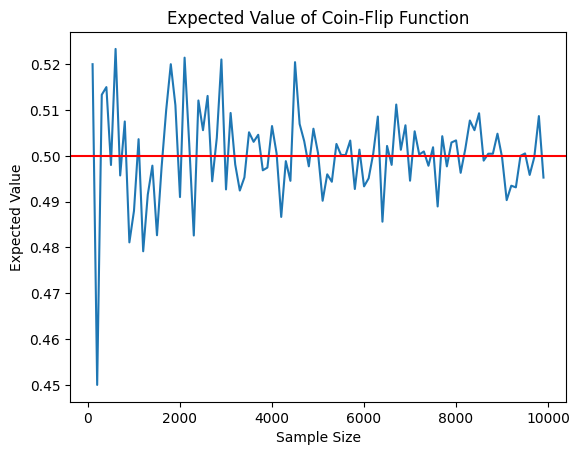

In [5]:
# For a range of sample sizes, compute the expected value of the coin-flip function
coin_flip_p = 0.5
sample_sizes = np.arange(100, 10000, 100)

# Compute the expected value for each sample size
expected_values = np.zeros(len(sample_sizes))
for i, size in enumerate(sample_sizes):
    samples = [coin_flip(coin_flip_p) for i in range(size)]
    expected_values[i] = mc_expected_value(samples)

# Plot the expected value as a function of sample size
plt.plot(sample_sizes, expected_values)
# The expected value of a coin flip is p
plt.axhline(y=coin_flip_p, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Expected Value')
plt.title('Expected Value of Coin-Flip Function')
plt.show()

### What in the graph above is the "epistemic uncertainty"? And what is the aleatoric uncertainty?

The epistemic uncertainty is the uncertainty in the expected value of the coin-flip function as a function of sample size.

The aleatoric uncertainty is the uncertainty in the outcome of the coin flip itself, which is a random process governed by the probability p.

The epistemic uncertainty decreases as the sample size increases, while the aleatoric uncertainty remains constant.

### Let us extend the MC estimation to the variance of the coin-flip function

In [6]:
## Define the MC function that computes the variance of given samples
def mc_variance(samples):
    return 1/len(samples) * sum([(sample - mc_expected_value(samples))**2 for sample in samples])

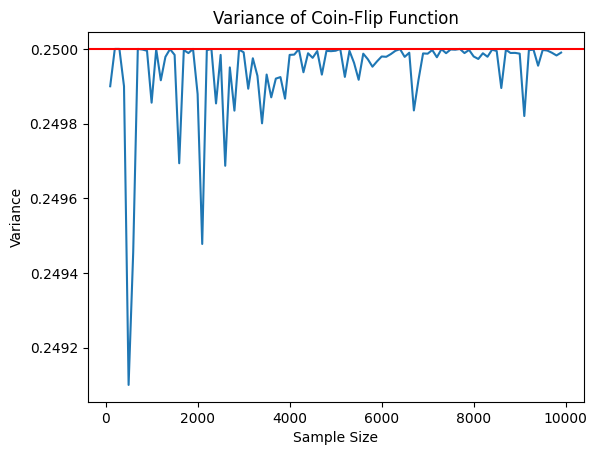

In [7]:
## For a range of sample sizes, compute the variance of the coin-flip function
variances = np.zeros(len(sample_sizes))
for i, size in enumerate(sample_sizes):
    samples = [coin_flip(coin_flip_p) for i in range(size)]
    variances[i] = mc_variance(samples)

## Plot the variance as a function of sample size
plt.plot(sample_sizes, variances)
# The variance of a coin flip is p(1-p)
plt.axhline(y=coin_flip_p*(1-coin_flip_p), color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Variance of Coin-Flip Function')
plt.show()

### Are the graphs above always the same every-time you run the simulation? What makes it change? Could you fix it?

### Bonus: Extend the above to compute the expected value and variance of other distributions

# Example 2: Estimating $\pi$ from a Circle and a Square

## How to use MC sampling to compute/estimate the value of $\pi$

### Computing $\pi$, based on the ratio of areas

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/EstimatePiFromCircleSquare.png" width="256"> 

To estimate the value of $\pi$, we can use the area of circle and square. 

$$ \frac{Area Circle}{Area Square} = \frac{\pi*r^2}{2r * 2r}  = \frac{\pi}{4}  $$

$\pi$ value can be estimate using the following formula

$$ \pi = 4* \frac{Area \ Circle}{Area \ Square} $$

### For ease of computation, 

Assum3 $r = 0.5$, and length_of_field = $2r = 1.0$

## Monte Carlo approach to estimate the value of $\pi$

We will use MC sampling to compute the area of a unit circle, as well as the unit square that encloses it

In [8]:
# Simulate a MC draw, as a "raindrop"
# return x and y coordinates of raindrop, centered at 0
def raindrop(length_of_field=1):
    x = np.random.uniform(-length_of_field/2, length_of_field/2)
    y = np.random.uniform(-length_of_field/2, length_of_field/2)
    return x, y

In [9]:
# Define function to check whether raindrop is inside circle
def is_inside_circle(x, y, length_of_field=1):
    return x**2 + y**2 < (length_of_field/2)**2


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


3.076


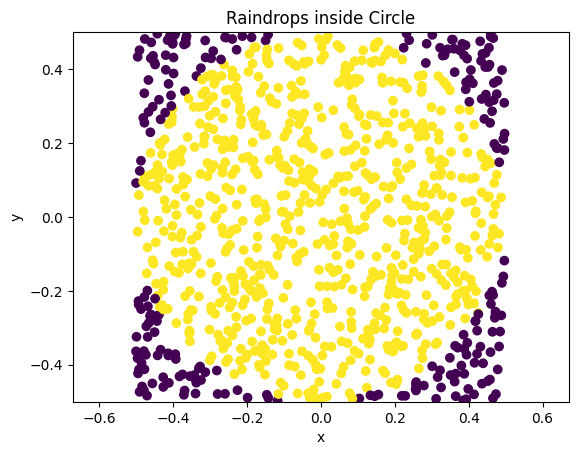

In [10]:
# Draw a bunch of raindrops
num_drops = 1000
raindrops = [raindrop() for i in range(num_drops)]

# Check whether each raindrop is inside the circle
inside_circle = [is_inside_circle(x, y) for x, y in raindrops]

# Compute the fraction of raindrops that are inside the circle
fraction_inside_circle = sum(inside_circle) / num_drops

# Compute the estimated pi value
estimated_pi = 4 * fraction_inside_circle

# Print the estimated pi value
print(estimated_pi)

# Plot the raindrops
raindrops = np.array(raindrops)
plt.scatter(raindrops[:, 0], raindrops[:, 1], c=inside_circle)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raindrops inside Circle')
# Tighten the layout, to -length_of_field/2 to length_of_field/2
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()


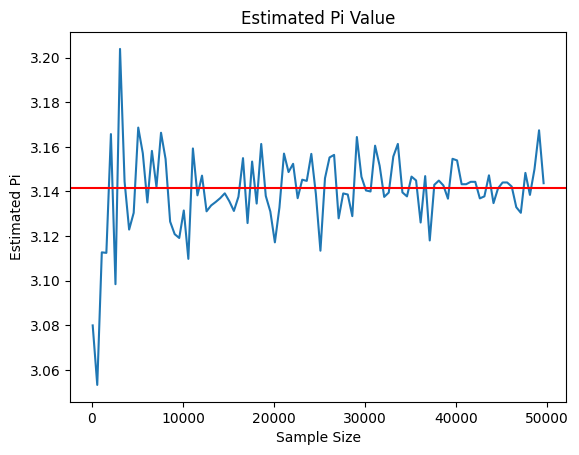

In [11]:
# Now evaluate the above simulation for a range of sample sizes
sample_sizes = np.arange(100, 50000, 500)
estimated_pis = []
for size in sample_sizes:
    raindrops = [raindrop() for i in range(size)]
    inside_circle = [is_inside_circle(x, y) for x, y in raindrops]
    fraction_inside_circle = sum(inside_circle) / size
    estimated_pis.append(4 * fraction_inside_circle)

# Plot the estimated pi value as a function of sample size
plt.plot(sample_sizes, estimated_pis)
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()


### Is the above curve equal every-time you run the simulation?


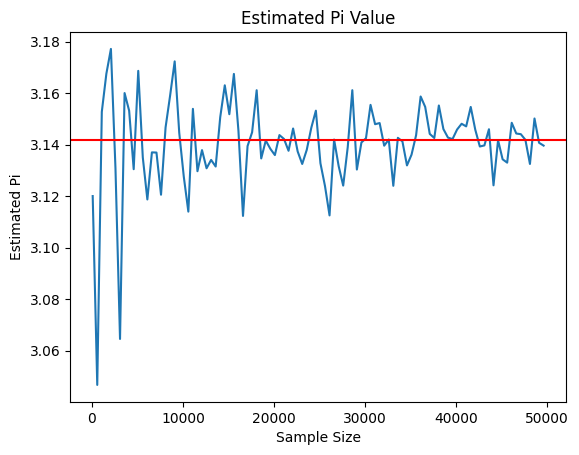

In [12]:
# Set the random seed
np.random.seed(0)

# Now evaluate the above simulation for a range of sample sizes
sample_sizes = np.arange(100, 50000, 500)
estimated_pis = []
for size in sample_sizes:
    raindrops = [raindrop() for i in range(size)]
    inside_circle = [is_inside_circle(x, y) for x, y in raindrops]
    fraction_inside_circle = sum(inside_circle) / size
    estimated_pis.append(4 * fraction_inside_circle)

# Plot the estimated pi value as a function of sample size
plt.plot(sample_sizes, estimated_pis)
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()

## Are the curves above converging to the true value of pi?

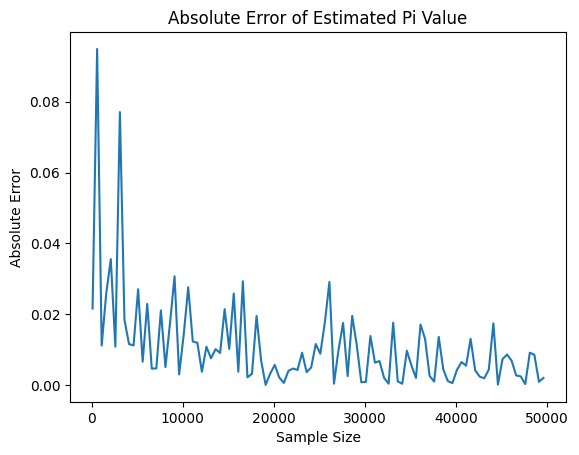

In [13]:
# Compute the absolute error of the estimated pi value
absolute_errors = np.abs(np.array(estimated_pis) - np.pi)
# Plot the curve of absolute errors, is it converging to zero?
plt.plot(sample_sizes, absolute_errors)
plt.xlabel('Sample Size')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Estimated Pi Value')
plt.show()

## Replicate the above experiment for a range of different random seeds

In [14]:
# Set the random seeds
random_seeds = np.arange(10)

# Now evaluate the above simulation for a range of sample sizes
sample_sizes = np.arange(100, 50000, 500)
estimated_pis = np.zeros((len(random_seeds), len(sample_sizes)))

for i, seed in enumerate(random_seeds):
    np.random.seed(seed)
    print(f'Random Seed: {seed}')
    for j, size in enumerate(sample_sizes):
        raindrops = [raindrop() for i in range(size)]
        inside_circle = [is_inside_circle(x, y) for x, y in raindrops]
        fraction_inside_circle = sum(inside_circle) / size
        estimated_pis[i, j] = 4 * fraction_inside_circle


Random Seed: 0
Random Seed: 1
Random Seed: 2
Random Seed: 3
Random Seed: 4
Random Seed: 5
Random Seed: 6
Random Seed: 7
Random Seed: 8
Random Seed: 9


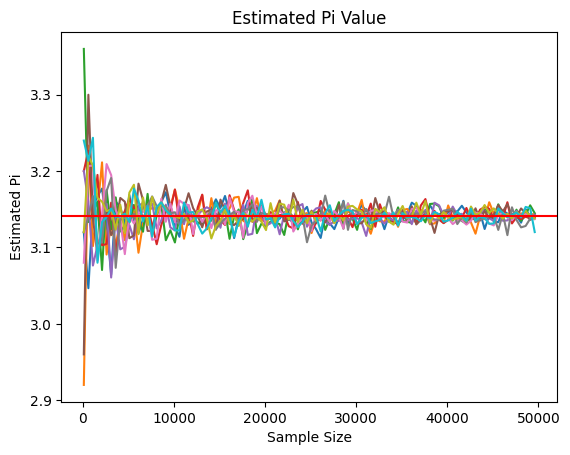

In [15]:
# Plot the estimated pi value as a function of sample size
for i in range(len(random_seeds)):
    plt.plot(sample_sizes, estimated_pis[i, :])
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()


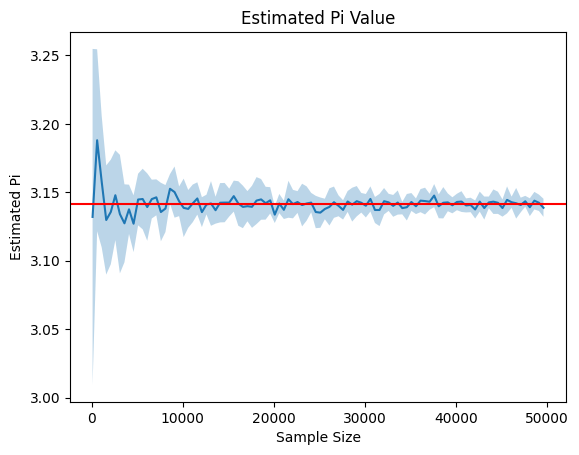

In [16]:
# Plot the average and standard deviation of the estimated pi value as a function of sample size
average_estimated_pis = np.mean(estimated_pis, axis=0)
std_estimated_pis = np.std(estimated_pis, axis=0)
plt.plot(sample_sizes, average_estimated_pis)
plt.fill_between(sample_sizes, average_estimated_pis - std_estimated_pis, average_estimated_pis + std_estimated_pis, alpha=0.3)
# The true value of pi
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Estimated Pi Value')
plt.show()

# What is your problem of interest?
- Are you trying to compute an integral in practice?
- Can you think of ways of applying MC to solve your problem?